In [3]:
!pip install tweepy
!pip install preprocessor
!pip install textblob

import os
import pandas as pd
import tweepy
import re
import string
import preprocessor as p
import csv
import sys
from textblob import TextBlob

import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/utkarshshroff/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/utkarshshroff/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
# Obtain stock tickers

data = pd.read_html('https://en.wikipedia.org/wiki/List_of_S&P_500_companies')
#print(data)
table = data[0]
#table.head()
tickers = table['Symbol'].tolist()
print(tickers)

['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'T', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ARNC', 'ANET', 'AJG', 'AIZ', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BKR', 'BLL', 'BAC', 'BK', 'BAX', 'BDX', 'BRK.B', 'BBY', 'BIIB', 'BLK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BF.B', 'CHRW', 'COG', 'CDNS', 'CPB', 'COF', 'CPRI', 'CAH', 'KMX', 'CCL', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'CPRT', 'GLW', 'CTVA', 'COST', 'COTY', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DH

In [ ]:
import datetime
import pandas_datareader as pdr
startdate = datetime.datetime(2020,3,23)
enddate = datetime.datetime(2020,3,27)

u_tickers = []
for t in tickers:
        u_tickers.append(t)

file = open("updated_stocks_shroff.csv",'w',newline='')
for u in u_tickers:
        try:
            st = pdr.get_data_yahoo(u,start=startdate,end=enddate)
            st['pct_change'] = st['Adj Close'].pct_change(4)
            #print(ticker + str(st['Adj Close']) + str(st['pct_change']))
            stockdata = csv.writer(file)
            stockdata.writerow([u,st['pct_change'].iloc[-1]])
        except:
            pass

file.close()

In [5]:
consumer_key = 'VXiAchkDU2jAhNyIfKAbK2ZvV'
consumer_secret = 'AgwXhMpHtwAX4bJkNnkVgDIOHrURZ83I8Qy3nGP6mqbLFTgafn'
access_key= '1215010547004915712-tBLuitlvkfsxXDGUVN5UMbuIa1RofJ'
access_secret = 'tZssehHXRoX7puH9v8Wqeoqh2uWIS6Xd1YxSPigcgxnZM'

#Pass twitter credentials to tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key,access_secret)
api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

file = open("sentiment_tweets_Utkarsh.csv","w",newline='')
alltweets = csv.writer(file)

for ticker in u_tickers:
    query = "$"+ticker + " -filter:retweets -filter:replies"
    tweets = tweepy.Cursor(api.search,q=query,lang='en',tweet_mode='extended').items(100)
    for tweet in tweets:
        status=tweet._json
        created_at = status['created_at']
        tweet_id = status['id_str']
        tweet_text = status['full_text']
        tweet_text = re.sub(r'\W', ' ',tweet_text)
        print(tweet_text)
        try: 
            alltweets.writerow([ticker,created_at,tweet_id, tweet_text])
        except UnicodeEncodeError:
            pass

file.close()

Have  500 to Spare  Then Buy These 4 Top Stocks Now  themotleyfool  stocks  MCD  BRK A  BRK B  PM  NEWR https   t co yZroJbR0ts
 DHI  HD  HIIQ  MCD  PM           speechless https   t co S9gLT5b8Ab
 Valued on expected earnings  BAT and Imperial are back where they were in the late  90s when liability lawsuits posed a real threat of tipping the companies into bankruptcy   Apart from  BATS LN   PM  amp   MO valuation also look historically  cheap   I am still cautious on  IMB LN  https   t co Jo3sznd9jw https   t co MwF5Ep0KMD
Short sale volume  not short interest  for  MO at 2020 03 27 is 45   https   t co Y0Myh5cHfi  BTI 56   PM 51   XXII 51   VGR 47 
 PM s in Downtrend  Moving Average Convergence Divergence  MACD  Histogram just turned negative  View odds for this and other indicators  https   t co XyVy8tFO8h  PhilipMorrisInternational  stockmarket  stock  technicalanalysis  money  trading  investing  daytrading  news  today https   t co gJfkWK8hjK
A Beginner s Guide to Stock Investing

Rate limit reached. Sleeping for: 756


Regions Financial  RF Trading Down 6 5  https   t co RqNxIGlrWT
 FTR down 57  OVERSOLD   https   t co iXmckjtbZu   GE  BAC  F  FCX  JCP  CHK  AUY  PBR  CLF  WFC  AA  ABBV  KMI  DIS  TSM  BK  PM  JPM  NOK  GGP  ORCL  PFE  KEY  BB  C  IBM  WMB  BABA  RF  MRO  NBR  ABX  ITUB  AAPL  S  XOM  P  JPM  shmp  T  F  BA  AA  HK  FNMA  PFE  HCAT  MOSY
Head To Head Review  Regions Financial  RF and Emclaire Financial  EMCF https   t co d3mbNguJBX
 RF enters a Downtrend because Momentum Indicator dropped below the 0 level on February 20  2020  View odds for this and other indicators  https   t co GJDSf7e9f8  RegionsFinancial  stockmarket  stock  technicalanalysis  money  trading  investing  daytrading  news  today https   t co 8CGpSygkDL
Regions Fin   RF  is down 5 6    https   t co 5sDMt2TTmO
Regions Financial Corp  RF Receives  16 77 Average Price Target from Brokerages https   t co IK6mhCHCTi
 NBY news    coronavirus bouncing premarket      GE  BAC  F  FCX  JCP  CHK  AUY  PBR  CLF  WFC  AA  ABBV 

Rate limit reached. Sleeping for: 756


Bank of America Cuts State Street  STT Price Target to  50 00 https   t co Y0H4B8sCrB
Bank of America Cuts State Street  STT Price Target to  50 00 https   t co rQeE3yxEOT
 STT s Aroon indicator reaches into Uptrend on March 25  2020  View odds for this and other indicators  https   t co eJLFAEJTEV  StateStreet  stockmarket  stock  technicalanalysis  money  trading  investing  daytrading  news  today https   t co 4ob6tJmeWW
Short sale volume  not short interest  for  BK at 2020 03 25 is 43   https   t co gFqIIz3a6E  WFC 44   CM 58   STT 32   NTRS 67 
 C  JPM  MS  BAC  SBNY  GS  ETFC  AMTD  SCHW  WFC  USB  TRV  MET  CME  BK  CB  STT  PNC  NTRS  ALL  MMC  PBCT  COF  FNMA  FMCC  HBAN  FAZ  FAS  HSBC  XLF  MTB  CACI  PFG  FISV  MSFT  AAPL  GOOG  TSLA  stimulusbill  StimulusPlan  StimulusPackage2020  stimuluschecks  Trump  COVID19 https   t co jHUnwAZItj
Yall realize this bill was supposed to be passed at least last week if not earlier  amp  markets bid with headline floods for previous 2 t

Rate limit reached. Sleeping for: 757


 TWTR  FB  GOOG   The survey  released by the Interactive Advertising Bureau  asked 390 media buyers  media planners    https   t co umGmvUaaGz
 TWTR ends the day indecisive  https   t co 5IcP0v9E1K Sentiment  Neutral  TWTR  Twitter
 ZVTK looking for acquisitions in IoT  Business Sector Automation  Artificial Intelligence  Digital Healthcare primed to move off chart base    TSLA  UBER  TWTR  FB  AAPL  MSFT   pennystocks  zvtk  zevotek  daytrading  stocks  news https   t co Ew0zEZL1Oh
Solid weeks end over at  TRICKTRADES  FB right to plan  was looking weak  but stuck to plan  gave standard risk and trusted level  nice and green one and done   SPY  QQQ  AAPL  BABA  NVDA  TSLA  AMD  MSFT  TWTR  MU  AMZN  NFLX Proper education at https   t co ed0i7LS2SN https   t co Ua8b2v9vpv
Broader  macroeconomic situation exp 2 improve in H2 2020   adspending usually stronger in H2   thus  stronger results may help 2 offset weakness in H1 bc  coronavirus  pandemic   digitalmarketing  ecommerce  mcommer

Rate limit reached. Sleeping for: 757


Westinghouse Air Brake Technologies Corp  WAB Short Interest Down 12 6  in March https   t co RZUcFTkaqr
Westinghouse Air Brake Technologies Corp  WAB Short Interest Down 12 6  in March  https   t co EdIxf5vlO7
Westinghouse Air Brake Technologies Corp  WAB Short Interest Down 12 6  in March https   t co XV1hKyjDZZ  stocks
Westinghouse Air Brake Technologies Corp  WAB Short Interest Down 12 6  in March https   t co JidoBe28D3
 WAB unusual put sweep  249 May 15  45 puts opened for  4 20   104K premium  2 OI
 KIQ short   to float is 11 07  https   t co hu9mhDdXx7  TRN 9 99   WAB 11 07 
 WAB Max Pain is 65 00 for maturity 04 17 2020   maxpain  options https   t co 1elDskWcb9 https   t co nK1f9GG741
Westinghouse Air Brake Technologies  WAB Shares Up 11 7  https   t co E0mRPyE0KX
 WAB on rail efficiency  UNP  CSX  NSC  CP https   t co hUzNuSq91C
 CP  WAB NEW ARTICLE   Top Railroad Stocks for Q2 2020 https   t co Ubjzg5iRmh Get all the latest  CP related news here   https   t co 1RpkE8ioEu ht

In [24]:
file = open("sentiment_tweets_Utkarsh.csv","r")
alltweets = csv.reader(file)

sentiment_file = open("final_sentiment_tweets_shroff.csv","w",newline='')
sntTweets=csv.writer(sentiment_file)

for row in alltweets:
    blob = TextBlob(row[3])
    if blob.sentiment.polarity>0:
        sntTweets.writerow([row[0],row[1],row[2],row[3], blob.sentiment.subjectivity, blob.sentiment.polarity,"positive"])
    elif blob.sentiment.polarity<0:
        sntTweets.writerow([row[0],row[1],row[2],row[3], blob.sentiment.subjectivity, blob.sentiment.polarity,"negative"])     
    elif blob.sentiment.polarity==0:
        sntTweets.writerow([row[0],row[1],row[2],row[3], blob.sentiment.subjectivity, blob.sentiment.polarity,"neutral"])    
        
file.close()
sentiment_file.close()

In [ ]:
df_sentiment = pd.read_csv("updated_stocks_shroff.csv")
df_sentiment.describe()

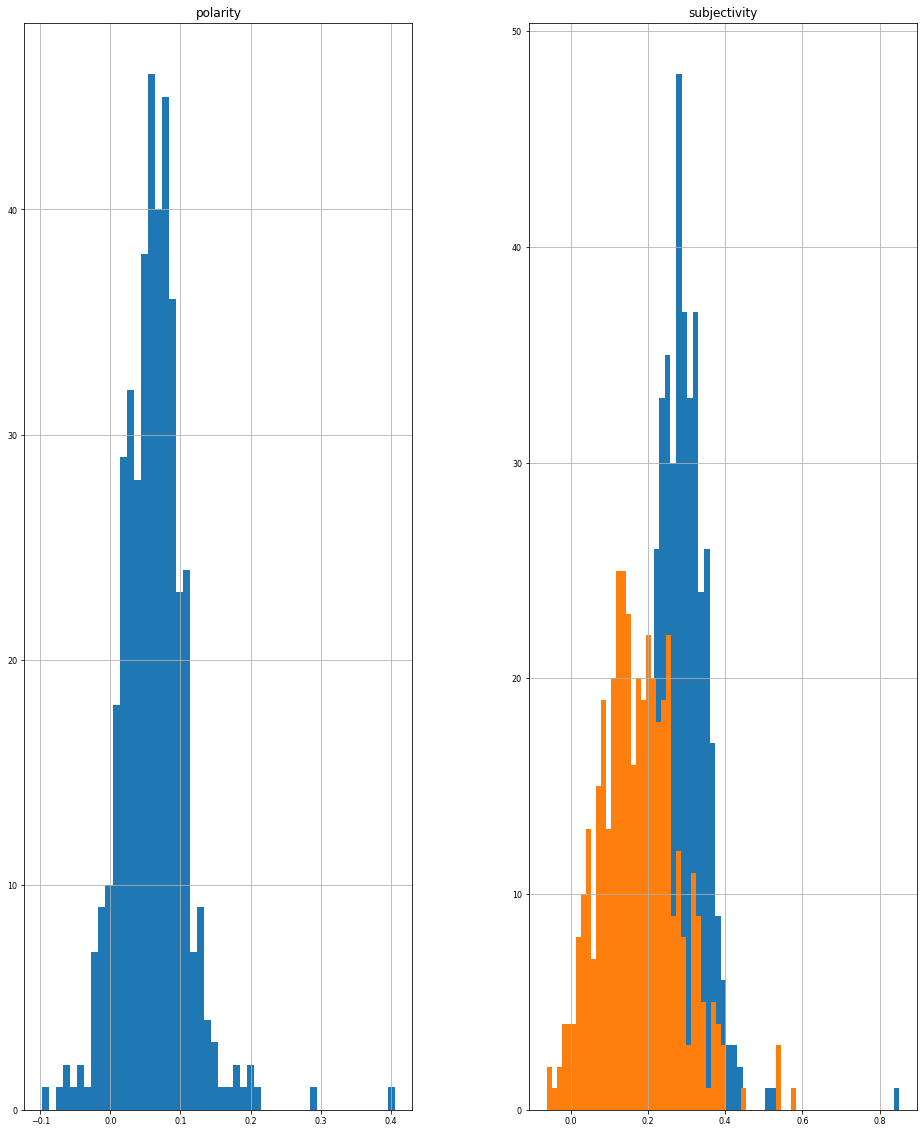

In [45]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re


selected_columns = df_sentiment[['polarity','subjectivity']]
target = df_sentiment['pct_change']

selected_columns.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
target.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

plt.show()


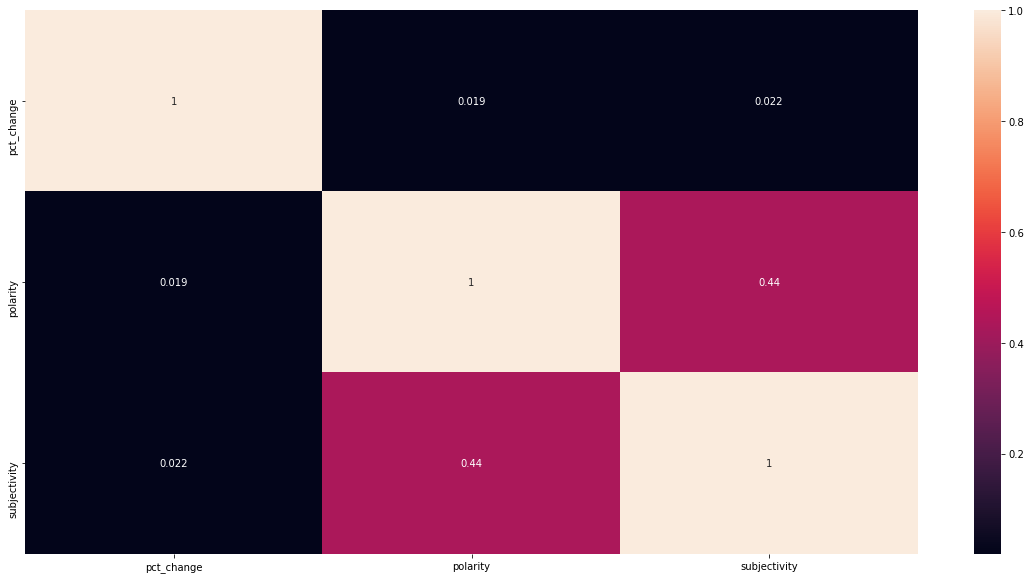

In [48]:
df_sentiment.corr()
plt.figure(figsize=(20,10))
sns.heatmap(df_sentiment.corr(), annot=True)
plt.show()

In [46]:
df_predictor= selected_columns
target= df_sentiment.iloc[:, df_sentiment.columns == 'pct_change']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_predictor, target, 
                                                    test_size=0.2, random_state=0)
print("x_train ",X_train.shape)
print("x_test ",X_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)

x_train  (340, 2)
x_test  (86, 2)
y_train  (340, 1)
y_test  (86, 1)


In [47]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

AdaBoost = AdaBoostClassifier(n_estimators=100, 
                              base_estimator=DecisionTreeClassifier(max_depth=1),
                              random_state=0)

model_AB=AdaBoost.fit(X_train,y_train)

acc_adaboost = round(AdaBoost.score(X_train, y_train) * 100, 2)
print("Model accuracy in the training sample is: ", acc_adaboost, "%")


/Users/utkarshshroff/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Unknown label type: 'continuous'